In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

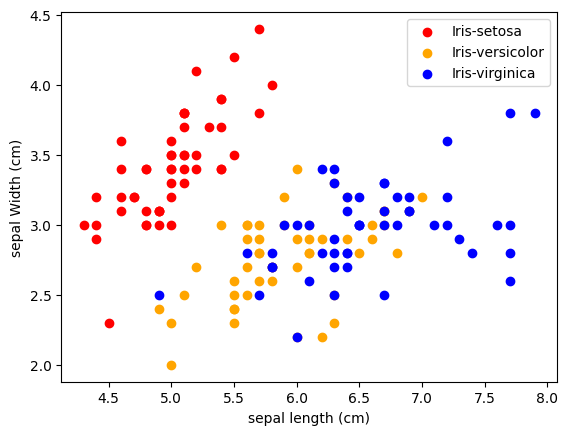

In [7]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'orange', 'blue']

# Scatter plot
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], color=colors[i], label=species[i])

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal Width (cm)")
plt.legend()
plt.show()

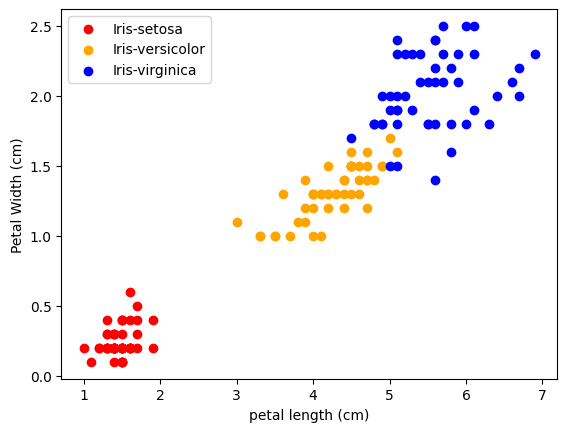

In [8]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'orange', 'blue']

# Scatter plot
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], color=colors[i], label=species[i])

plt.xlabel("petal length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.show()

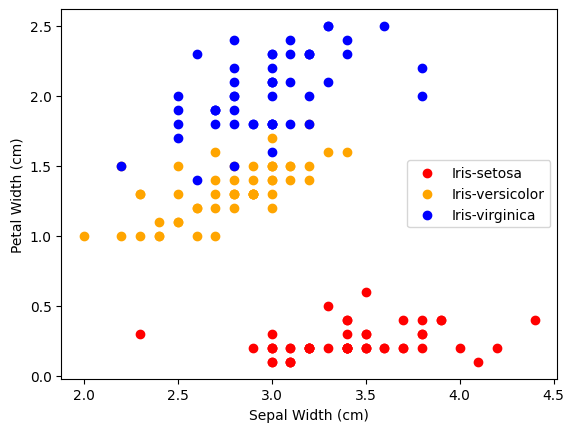

In [9]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'orange', 'blue']

# Scatter plot
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], color=colors[i], label=species[i])

plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

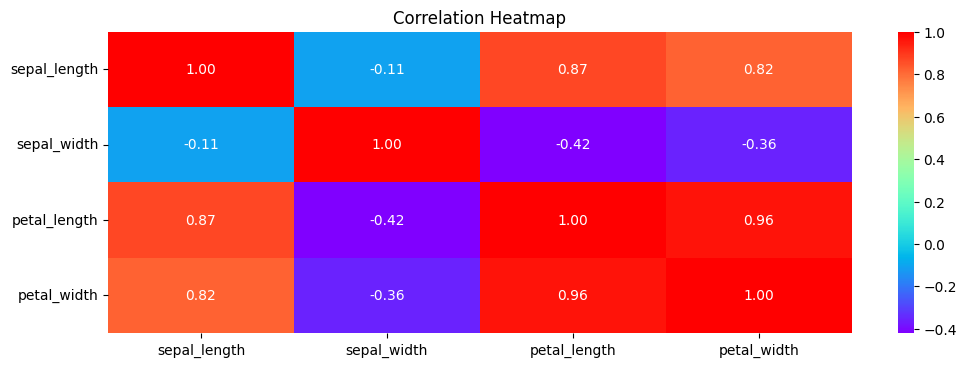

In [10]:
#numeric_df = df.select_dtypes(include=['float64', 'int64'])
data_for_heatmap = df[['sepal_length','sepal_width','petal_length','petal_width']].copy()

# Plotting
plt.figure(figsize=(12, 18))

# Heatmap
plt.subplot(4, 1, 2)
sns.heatmap(data_for_heatmap.corr(), annot=True, cmap='rainbow', fmt='.2f')
plt.title('Correlation Heatmap')


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [48]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [50]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [51]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [52]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [53]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, cv=5)
print(f'Cross-Validation Accuracy: {scores.mean() * 100:.2f}%')

Cross-Validation Accuracy: 97.33%
